# APPLYING  SUBSET SELECTION FOR LINEAR REGRESSION AND
# SHRINKAGE METHODS ON HAPPINESS DATASET

## INDEX

#### 1. SUMMARY OF THE DATASET
#### 2. DATA EXPLORATION
#### 3. SUBSET SELECTION FOR LINEAR REGREESION
##### 3.1. BEST SUBSET SELECTION
##### 3.2. STEPWISE SELECTION
        3.2.1. FORWARD SELECTION
        3.2.2. BACKWARD SELECTION
##### 3.3. SHRINKAGE METHODS
        3.3.1. RIDGE REGRESSION
        3.3.2. THE LASSO    
#### 4. CHOOSING THE BEST MODEL AND FINAL EXPLANATION

## 1. SUMMARY OF THE DATASET

For clustering, we used 2019 World Happiness Report dataset which is a survey of the state of global happiness taken from the Gallup World Poll. In total we have 8 features to compare.

**Country** : Name of the countries attended the survey.

**Happiness score** :  The final  scores that estimate the extent of six happiness factors below. 

**GDP per capita**: GDP per capita is a measure of a country's economic output that accounts for its number of people.

**Social support**: Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.

**Healthy life expectancy**: Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.

**Freedom to make life choices**: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

**Generosity**: The quality of being kind and generous.

**Perceptions of corruption**: The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

## 2. DATA EXPLORATION

In [1]:
# To begin the process, the modules that will be used during analysis must be imported first.

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
np.random.seed(0)

In [2]:
# Then, response variable must be shown and independent variable must be created.

df= pd.read_csv("happiness.csv")
df.head()

,Overall rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# Dimension of the dataframe interpreted.
df.shape

(156, 9)

In [4]:
# This code will show how many different outputs do x variables have
df.nunique()

Overall rank                    156
Country                         156
Happiness Score                 155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

In [5]:
# Checking if there is any missing value in dataset
df.isnull().sum()

Overall rank                    0
Country                         0
Happiness Score                 0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
# Defining and dropping response variable which is "Happiness Score"
# Furthermore, "Overall rank" and "Country" variables must be dropped either, 
# since it is not needed to identify them as independent variables.

y = df["Happiness Score"]
x = df.drop(columns=["Happiness Score", "Overall rank", "Country"])
x

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [7]:
#Then, dataset must be splitted into training an test sets
# Here, test size proportion was chosen as 0.2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [8]:
# According to the response variables, it has decided as "regression must be applied".
y.head()

0    7.769
1    7.600
2    7.554
3    7.494
4    7.488
Name: Happiness Score, dtype: float64

## 3. SUBSET SELECTION FOR LINEAR REGRESSION

## 3.1. BEST SUBSET SELECTION

In [9]:
# Fitting 2**p subsets, and than sort these subsets according to their scores.
# Then, choosing the best subset with the minimum Mean Squared Error score, since MSE is chosen as error detection method.
# Dataset has 6 active independent,x, variables. Hence, min_features was selected as 1 and max_features was selected as 6.
# Also feature names are identified to correspond with their values.

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()

efs = EFS(linear_model,
          min_features = 1,
          max_features = 6,
          scoring="neg_mean_squared_error",
          print_progress = True,
          cv=5)

feature_names = ("GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", 
                 "Generosity", "Perceptions of corruption")

efs.fit(x_train, y_train, custom_feature_names = feature_names)
efs.best_score = (-1)*efs.best_score_

print("Best MSE score: %.2f" % (efs.best_score_*(-1)))
print("Best subset:", efs.best_idx_)
print("Best subset (corresponding names):", efs.best_feature_names_)

Features: 63/63

Best MSE score: 0.33
Best subset: (0, 1, 2, 3, 5)
Best subset (corresponding names): ('GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption')


In [10]:
# The dataset has 6 different features, 63 different subsets. And one of them is null (0) subset.
# By using the subsets_ attribute, preferably had taken a look at selected feature indices at each step.
efs.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([-0.4672812 , -0.6017266 , -0.38106414, -0.62313917, -0.46584783]),
  'avg_score': -0.5078117868387727,
  'feature_names': ('GDP per capita',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.33601961, -0.45279565, -0.54984932, -0.62005357, -0.65505527]),
  'avg_score': -0.5227546867529144,
  'feature_names': ('Social support',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([-0.3698855 , -0.61823301, -0.49484398, -0.54980532, -0.55721215]),
  'avg_score': -0.517995993150363,
  'feature_names': ('Healthy life expectancy',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([-0.59156199, -0.81157017, -1.11632714, -0.80711048, -1.06225665]),
  'avg_score': -0.8777652864904407,
  'feature_names': ('Freedom to make life choices',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([-1.03376026, -1.25840488, -1.35815447, -1.68864925, -1.16426297]),
  'avg_score': -1.3006463645679351,
  'feature_names': ('Generosity',)},
 5: {'feature_idx': (5

In [11]:
# Dictionary values must be converted into dataframe.
# Furthermore, scores must be sorted highest to lowest, so "ascending" was defined as False
pd.DataFrame.from_dict(efs.get_metric_dict()).T.sort_values("avg_score", ascending =False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
57,"(0, 1, 2, 3, 5)","[-0.25978957518240464, -0.27968626896873094, -...",-0.333475,"(GDP per capita, Social support, Healthy life ...",0.0751715,0.058486,0.029243
41,"(0, 1, 2, 3)","[-0.2569198882919649, -0.3095091597495441, -0....",-0.33419,"(GDP per capita, Social support, Healthy life ...",0.0699185,0.0543989,0.0271995
56,"(0, 1, 2, 3, 4)","[-0.2466065463436417, -0.30770393398149387, -0...",-0.337527,"(GDP per capita, Social support, Healthy life ...",0.0798159,0.0620995,0.0310497
62,"(0, 1, 2, 3, 4, 5)","[-0.25659343575048554, -0.28313549000026783, -...",-0.33891,"(GDP per capita, Social support, Healthy life ...",0.0826379,0.0642951,0.0321476
45,"(0, 1, 3, 5)","[-0.2751610787243343, -0.2614355774063514, -0....",-0.347146,"(GDP per capita, Social support, Freedom to ma...",0.0899722,0.0700014,0.0350007
...,...,...,...,...,...,...,...
3,"(3,)","[-0.5915619941744733, -0.8115701671432194, -1....",-0.877765,"(Freedom to make life choices,)",0.245376,0.190911,0.0954555
18,"(3, 4)","[-0.6407871476737464, -0.7725271184731561, -1....",-0.894454,"(Freedom to make life choices, Generosity)",0.209913,0.16332,0.0816599
5,"(5,)","[-0.9739154029066242, -0.8482271644357512, -1....",-1.1179,"(Perceptions of corruption,)",0.27517,0.214092,0.107046
20,"(4, 5)","[-0.9713127015481244, -0.837833578657559, -1.4...",-1.13264,"(Generosity, Perceptions of corruption)",0.298074,0.231912,0.115956


In [12]:
# 57th subset must be chosen since it has the highest average score.
# And then, the score of 57th subset as shown.
# And it is equal to 18.57 %

linear_model = LinearRegression()
x_train_selected = x_train.iloc[:,[0, 1, 2, 3, 5]]
x_test_selected = x_test.iloc[:,[0, 1, 2, 3, 5]]

linear_model.fit(x_train_selected, y_train)

pred0 = linear_model.predict(x_test_selected)
mse1 = mean_squared_error(y_test, pred0)
print("MSE1 (Best Subset Selection MSE):", format(mse1, ".4f"))

MSE1 (Best Subset Selection MSE): 0.1857


## 3.2. STEPWISE SELECTION

### 3.2.1. FORWARD SELECTION

- In this part, variables must be added one by one until all of the predictors are in the model.

- "k_features" is identified as 6 
since the forward selection logorithm will process by adding predictors with highest scored cross validation.

- To obtain forward selection "forward" option must be identified as True.
- Scoring method is neg_mean_squared_error 

In [13]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
linear_model_2 = LinearRegression()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
linear_model_2 = LinearRegression()

sfs = SFS(linear_model_2, k_features=6, forward = True, floating = False, scoring = 'neg_mean_squared_error', cv=5)

feature_names = ("GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", 
                 "Generosity", "Perceptions of corruption")
sfs = sfs.fit(x_train, y_train, custom_feature_names = feature_names)

sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([-0.4672812 , -0.6017266 , -0.38106414, -0.62313917, -0.46584783]),
  'avg_score': -0.5078117868387727,
  'feature_names': ('GDP per capita',)},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([-0.33941742, -0.40622633, -0.35995223, -0.45705502, -0.5072423 ]),
  'avg_score': -0.4139786581452092,
  'feature_names': ('GDP per capita', 'Freedom to make life choices')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([-0.27263781, -0.29542446, -0.34451548, -0.37137724, -0.47618881]),
  'avg_score': -0.3520287603239829,
  'feature_names': ('GDP per capita',
   'Social support',
   'Freedom to make life choices')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([-0.25691989, -0.30950916, -0.33743158, -0.34271583, -0.4243743 ]),
  'avg_score': -0.3341901510767359,
  'feature_names': ('GDP per capita',
   'Social support',
   'Healthy life expectancy',
   'Freedom to make life choices')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_sco

In [14]:
# In this section dictionary values converted into a dataframe that shows values from highest to lowest.

pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values('avg_score', ascending = False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 1, 2, 3, 5)","[-0.25978957518240464, -0.27968626896873094, -...",-0.333475,"(GDP per capita, Social support, Healthy life ...",0.0751715,0.058486,0.029243
4,"(0, 1, 2, 3)","[-0.2569198882919649, -0.3095091597495441, -0....",-0.33419,"(GDP per capita, Social support, Healthy life ...",0.0699185,0.0543989,0.0271995
6,"(0, 1, 2, 3, 4, 5)","[-0.25659343575048554, -0.28313549000026783, -...",-0.33891,"(GDP per capita, Social support, Healthy life ...",0.0826379,0.0642951,0.0321476
3,"(0, 1, 3)","[-0.27263780989331127, -0.29542446128052, -0.3...",-0.352029,"(GDP per capita, Social support, Freedom to ma...",0.0915241,0.0712088,0.0356044
2,"(0, 3)","[-0.3394174181251258, -0.4062263280262821, -0....",-0.413979,"(GDP per capita, Freedom to make life choices)",0.0794223,0.0617932,0.0308966
1,"(0,)","[-0.46728120172456866, -0.6017265954813843, -0...",-0.507812,"(GDP per capita,)",0.117221,0.091202,0.045601


It has seen that highest avg_score includes 5 features which are 0, 1, 2, 3, 5th indexes.

- For training set, 0, 1, 2, 3, 4, 5th indexed features are selected since they will give the optimal solution.

In [15]:
# After fitting training and test sets, MSE of the Forward Selection process has shown below.

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linear_model1 = LinearRegression()
x_train_selected1= x_train.iloc[:,[0, 1, 2, 3, 5]]
x_test_selected1= x_test.iloc[:,[0, 1, 2, 3, 5]]
lm = linear_model.fit(x_train_selected1,y_train)

pred2 = lm.predict(x_test_selected1)
mse2=mean_squared_error(y_test,pred2)
print("Forward Selection MSE: ", format(mse2,".4f"))

Forward Selection MSE:  0.1857


### 3.2.2. BACKWARD SELECTION

- In this part, the model will begin with full features included oppositely of forward selection.
- Then, iteratively least useful features will be removed from the model.

In [16]:
# In opposite of forward selection, "k_features" is identified as 1 and "forward" option is identified as False.
# Since logorithm must function reversely.

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
linear_model_3 = LinearRegression()

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
linear_model_3 = LinearRegression()

sfs2 = SFS(linear_model_3, k_features=1, forward = False, floating = False, scoring = 'neg_mean_squared_error', cv=5)

feature_names = ("GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", 
                 "Generosity", "Perceptions of corruption")
sfs2 = sfs2.fit(x_train, y_train, custom_feature_names = feature_names)

sfs2.subsets_

{6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([-0.25659344, -0.28313549, -0.41216115, -0.33062124, -0.41204049]),
  'avg_score': -0.3389103596319142,
  'feature_names': ('GDP per capita',
   'Social support',
   'Healthy life expectancy',
   'Freedom to make life choices',
   'Generosity',
   'Perceptions of corruption')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([-0.25978958, -0.27968627, -0.40050361, -0.32862445, -0.39877358]),
  'avg_score': -0.33347549672615456,
  'feature_names': ('GDP per capita',
   'Social support',
   'Healthy life expectancy',
   'Freedom to make life choices',
   'Perceptions of corruption')},
 4: {'feature_idx': (0, 1, 2, 3),
  'cv_scores': array([-0.25691989, -0.30950916, -0.33743158, -0.34271583, -0.4243743 ]),
  'avg_score': -0.3341901510767359,
  'feature_names': ('GDP per capita',
   'Social support',
   'Healthy life expectancy',
   'Freedom to make life choices')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([-

In [17]:
# In this section dictionary values converted into a dataframe that shows values from highest to lowest.
pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values('avg_score', ascending = False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(0, 1, 2, 3, 5)","[-0.25978957518240464, -0.27968626896873094, -...",-0.333475,"(GDP per capita, Social support, Healthy life ...",0.0751715,0.058486,0.029243
4,"(0, 1, 2, 3)","[-0.2569198882919649, -0.3095091597495441, -0....",-0.33419,"(GDP per capita, Social support, Healthy life ...",0.0699185,0.0543989,0.0271995
6,"(0, 1, 2, 3, 4, 5)","[-0.25659343575048554, -0.28313549000026783, -...",-0.33891,"(GDP per capita, Social support, Healthy life ...",0.0826379,0.0642951,0.0321476
3,"(0, 1, 3)","[-0.27263780989331127, -0.29542446128052, -0.3...",-0.352029,"(GDP per capita, Social support, Freedom to ma...",0.0915241,0.0712088,0.0356044
2,"(0, 3)","[-0.3394174181251258, -0.4062263280262821, -0....",-0.413979,"(GDP per capita, Freedom to make life choices)",0.0794223,0.0617932,0.0308966
1,"(0,)","[-0.46728120172456866, -0.6017265954813843, -0...",-0.507812,"(GDP per capita,)",0.117221,0.091202,0.045601


- As it was in Forward Selection, our features with highest CV are stil 0, 1, 2, 3, 5 as it is expected.

In [18]:
# After fitting training and test sets, MSE of the Backward Selection process has shown below.

linear_model3 = LinearRegression()
x_train_selected3= x_train.iloc[:,[0, 1, 2, 3, 5]]
x_test_selected3= x_test.iloc[:,[0, 1, 2, 3, 5]]

pred3 = lm.predict(x_test_selected3)
mse3=mean_squared_error(y_test,pred3)
print("Backward Selection MSE: ", format(mse3,".4f"))

Backward Selection MSE:  0.1857


- The MSE score is 18.57% which is the same as in Forward Selection.

## 3.3. SHRINKAGE METHODS

### 3.3.1. RIDGE REGRESSION

- First the needed functions must be imported from different libraries.
- Main functions that will be used in shrinking process are RidgeCV, Lasso and LassoCV

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [20]:
alphas = 10**np.linspace(5,-2,100)*0.5
alphas

array([5.00000000e+04, 4.24876718e+04, 3.61040451e+04, 3.06795364e+04,
       2.60700414e+04, 2.21531073e+04, 1.88246790e+04, 1.59963357e+04,
       1.35929412e+04, 1.15506485e+04, 9.81520325e+03, 8.34050269e+03,
       7.08737081e+03, 6.02251770e+03, 5.11765511e+03, 4.34874501e+03,
       3.69536102e+03, 3.14014572e+03, 2.66834962e+03, 2.26743925e+03,
       1.92676430e+03, 1.63727458e+03, 1.39127970e+03, 1.18224471e+03,
       1.00461650e+03, 8.53676324e+02, 7.25414389e+02, 6.16423370e+02,
       5.23807876e+02, 4.45107543e+02, 3.78231664e+02, 3.21403656e+02,
       2.73113861e+02, 2.32079442e+02, 1.97210303e+02, 1.67580133e+02,
       1.42401793e+02, 1.21006413e+02, 1.02825615e+02, 8.73764200e+01,
       7.42484131e+01, 6.30928442e+01, 5.36133611e+01, 4.55581378e+01,
       3.87131841e+01, 3.28966612e+01, 2.79540509e+01, 2.37540508e+01,
       2.01850863e+01, 1.71523464e+01, 1.45752653e+01, 1.23853818e+01,
       1.05245207e+01, 8.94324765e+00, 7.59955541e+00, 6.45774833e+00,
      

In [21]:
#In this section, variables are being standardized
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
xscaled = scaler.fit_transform(x)

In [22]:
#Then, for each alpha value, "Ridge Regression" models will be fitted.

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(xscaled, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 6)

Text(0, 0.5, 'weights')

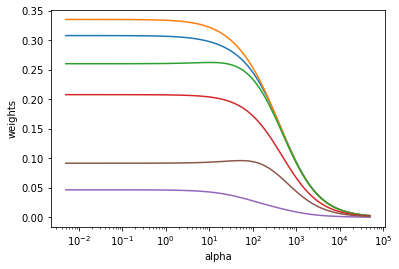

In [23]:
#To examine the model, visualization of the coefficients of the different alfas was proceeded.
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdas = np.linspace(0.01,1000,num=10000)
scoresCV = []
for l in lambdas:
    ridge_reg = Ridge(alpha=l)
    ridge_reg.fit(x_train, y_train)    
    scoreCV = cross_val_score(ridge_reg, x_train, y_train, scoring='neg_mean_squared_error',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df2 = pd.DataFrame(scoresCV,columns=['Lambda','Validation Error'])
df2
# Lambdas and Validation Errors for each index is shown as a table below

,Lambda,Validation Error
0,0.010000,0.349669
1,0.110009,0.346350
2,0.210018,0.343919
3,0.310027,0.342128
4,0.410036,0.340815
...,...,...
9995,999.599964,1.257343
9996,999.699973,1.257348
9997,999.799982,1.257354
9998,999.899991,1.257359


In [25]:
df2.sort_values(['Validation Error'])
df2

,Lambda,Validation Error
0,0.010000,0.349669
1,0.110009,0.346350
2,0.210018,0.343919
3,0.310027,0.342128
4,0.410036,0.340815
...,...,...
9995,999.599964,1.257343
9996,999.699973,1.257348
9997,999.799982,1.257354
9998,999.899991,1.257359


In [26]:
# Finding the best alpha using by RidgeCv function.

ridgecv = RidgeCV(alphas = alphas,cv = 10, scoring = 'neg_mean_squared_error')
ridgecv.fit(x_train, y_train)
print('Best alpha:', format(ridgecv.alpha_,'.4f'))

Best alpha: 0.6610


In [27]:
# Ridge was fitted by using training and calculating mean square error by using test set.

ridgecv = Ridge(alpha = ridgecv.alpha_)
ridgecv.fit(x_train, y_train)
mse4 = mean_squared_error(y_test, ridgecv.predict(x_test))
print("Ridge MSE:", format(mse4,".4f"))

Ridge MSE: 0.1864


In [28]:
#Then, ridge regression will be fitted by using the best alpha that was calculated above.
ridge.fit(x, y)
pd.Series(ridge.coef_, index = x.columns)

GDP per capita                  0.776148
Social support                  1.123943
Healthy life expectancy         1.077376
Freedom to make life choices    1.453259
Generosity                      0.489714
Perceptions of corruption       0.969595
dtype: float64

### 3.3.2. THE LASSO

Text(0, 0.5, 'weights')

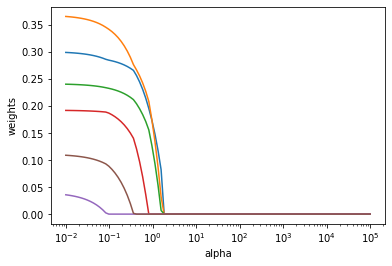

In [29]:
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [30]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(x_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
mse5 = mean_squared_error(y_test, lasso.predict(x_test))
print('MSE5: ', format(mse5,'.4f'))

MSE5:  0.1835


In [31]:
lassocv.alpha_

0.001778055592111914

In [32]:
pd.Series(lasso.coef_, index=x.columns)

GDP per capita                  0.768071
Social support                  1.166897
Healthy life expectancy         0.968745
Freedom to make life choices    1.362089
Generosity                      0.272539
Perceptions of corruption       1.009951
dtype: float64

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lambdas = np.linspace(0.01,100,num=1000)
scoresCV = []
for l in lambdas:
    lasso = Lasso(alpha=l,max_iter=10000)
    lasso.fit(x_train, y_train)    
    scoreCV = cross_val_score(lasso, x_train, y_train, scoring="neg_mean_squared_error",
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([l,-1*np.mean(scoreCV)])
df = pd.DataFrame(scoresCV,columns=["Lambda","Validation Error"])
df

,Lambda,Validation Error
0,0.01000,0.352847
1,0.11009,0.555978
2,0.21018,0.797056
3,0.31027,1.141526
4,0.41036,1.312370
...,...,...
995,99.59964,1.312370
996,99.69973,1.312370
997,99.79982,1.312370
998,99.89991,1.312370


In [34]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(x_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print("Lasso Alpha: ", lassocv.alpha_)

Lasso Alpha:  0.001778055592111914


In [35]:
#In this part, we aim to find the mean squared error in lasso process
mse5 = mean_squared_error(y_test, lasso.predict(x_test))
print("The Lasso MSE:", format(mse5, ".4f"))

The Lasso MSE: 0.1835


## 4. CHOOSING THE BEST MODEL AND FINAL EXPLANATION

In order to choose the best model with respect to test error, we directly use *mean square error* for each model as calculated above. Than we evaluate the perfomance of the model using cross validation.

- That is why we must detect the smallest MSE from the MSEs calculated for each method above.
- There are 5 different MSE values calculated respectively for Best Subset Selection, Forward Selection, Backward Selection, Ridge Regression and The Lasso.

In [36]:
# In order to choose the smallest MSE, for loop is created and MSEs listed by help of this algorithm.
# Here
mses = [mse1,mse2,mse3,mse4,mse5]
print('MSE RESULTS')
print('-----------')
z=1
for i in mses:
    print('MSE',z,' ', format(i,'.4f'),sep='')
    i+=1
    z+=1

MSE RESULTS
-----------
MSE1 0.1857
MSE2 0.1857
MSE3 0.1857
MSE4 0.1864
MSE5 0.1835


- It is clearly seen that each MSE is very similar to each other. However, MSE5 which belongs to The Lasso Method has the lowest score between all of the errors.

- Next step is to visualize the model by using Lasso Method within a graph which has axises for Actual and Predicted values.

Lasso Alpha:  0.001778055592111914


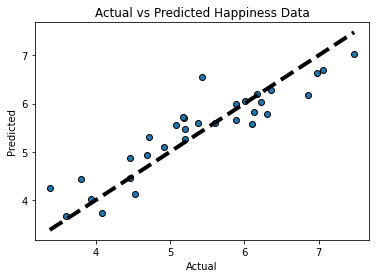

In [37]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(x_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print("Lasso Alpha: " ,lassocv.alpha_)

y_predicted = lasso.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Actual vs Predicted Happiness Data")
plt.show()

- After visualization, coefficients of chosen model must be shown.

In [38]:
pd.Series(lasso.coef_, index=x.columns)

GDP per capita                  0.768071
Social support                  1.166897
Healthy life expectancy         0.968745
Freedom to make life choices    1.362089
Generosity                      0.272539
Perceptions of corruption       1.009951
dtype: float64

## RESULTS AND EXPLANATION

It is a common idea that if every models can be tried, the optimal model can be found easily. However, this cannot be assumed correct. As it was seen in this research, searching the entire space with Best Subset Selection did not gave the minimum error. 

Furthermore, adding the features with high cross validation scores iteratively or removing the features from the full model did not give the minimum error neither.

So, it can be said that Best Subset Selection Methods; Forward and Backward Selections were not providing the optimal model since their Mean Squared Error was 18.57%.

In Ridge Regression models, model standardized coefficients at the beginning and than worked on them. Whenever Ridge Regression is applied, it is better to divide it into its standart deviations. Beacuse if they are not in the same scale, reducing them might have troubles. We picked the best alpha using validation on the training set.
Application the Ridge Regression gave the highest MSE in our dataset which is 18.64%.


In Lasso models, penalty has the effect of forcing some of the coefficient estimates to be exactly zero by using lambda value. In Ridge the feasible region is circle whether in Lasso usually is corner point. In lasso, as isocountour line gets bigger, SSE will increase.

 # # Why The Lasso Model Is Chosen?
 
As seen above, all the 6 features in our model which are,  GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption is used in Lasso Method. None of the features had the 0.0000 coefficient so, it was a must to use all of them.

Generally, it is common to see that Lasso eliminates some of the features to obtain a smaller MSE, yet, in this example, clearly all features were important for response variable.

Minimum MSE was obtained by The Lasso Model with 18.35%.


## Chosen Model

Best Model: **The Lasso**

Best Features: **GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, 
                 Generosity, Perceptions of corruption**

Feature Coefficents of Chosen Model:

    GDP per capita                  0.768071
    Social support                  1.166897
    Healthy life expectancy         0.968745
    Freedom to make life choices    1.362089
    Generosity                      0.272539
    Perceptions of corruption       1.009951
    
**Best MSE: "18.35"**